<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Evaluación de métodos de clasificación para la base de datos *Penguin* (Archipiélago *Palmer*)

Este *Notebook* contiene el trabajo necesario para cargar el fichero *.csv* de la base de datos de **Kaggle** denominada *Penguin dataset*.

## Autor
- Pedro Latorre Carmona

## Alumna
- Jimena Arnaiz González

## Curso 2023-2024

---
**Kaggle** es, digamos, un repositorio, donde podemos encontrar bases de datos, así como diferentes tipos de métodos (código), para tareas que pueden ir desde la clasificación, regresión, por citar sólo dos ejemplos:

https://www.kaggle.com/

Dentro de **Kaggle**, vamos a trabajar con la base de datos *Penguin*, en el **archipiélago Palmer**, en la Antártida. Las carcaterísticas de la base de datos y su descarga se pueden encontrar en:

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/#

Existe también un repositorio, que se puede consultar en:

https://github.com/allisonhorst/palmerpenguins/tree/main

La idea de esta práctica es poder crear una base de datos que permita inferir la clase de pingüino en función de las características de entrada elegidas.

---
### Datos

Este conjunto de datos contiene $344$ registros de características asociadas a ejemplares de pingüinos. En esta base de datos tenemos 3 clases:

1. *Adelie*
2. *Chinstrap*
3. *Gentoo*

Esta base de datos es en realidad un fichero **.csv** que tiene una tabla en la que cada fila es un **dato** asociado a un **ejemplo**. Dentro de cada fila (data), tenemos un conjunto de **atributos** o características, que conforman el vector con el que describimos dicho dato (denominado **vector de características**).

---
### Objetivo

El objetivo del trabajo a continuación es crear el conjunto de datos $(\mathbf{X,Y})$, generar los conjuntos de **entrenamiento** y **test** y aplicar dos métodos de clasificación:

1. Support Vector Machines (SVM)
2. Multilayer perceptron

Se tendrán que mostrar los resultados de clasificación de diferentes formas, y analizarlos.

Hay que tener en cuenta que el vector de características **formaría** la **entrada**, mientras que la etiqueta a predecir (es decir, la **salida**), sería la **clase**/**especie**.

---
Para el método de clasificación de **Support Vector Machines** (SVMs), se dará en clase una pequeña introducción, aunque se puede encontrar información muy fácilmente, ya que es un método muy usado:

https://en.wikipedia.org/wiki/Support_vector_machine

El clasificador denominado **Perceptrón multicapa** (**Multilayer perceptron**), no lo veremos, simplemente lo usaremos, aunque se puede encontrar información, por ejemplo, en (por ejemplo):

https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa

# Carga de la base de datos y aplicación de los métodos de clasificación


In [1]:
'''
Importación de librerías
'''
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
'''
Datos
'''

path = "./PenguinData"

penguins_size = path + os.sep + "penguins_size.csv"


### Carga del fichero csv como un *data frame*

In [3]:
# Utilizad la opción "pd.read_csv"

df = pd.read_csv(penguins_size)

In [4]:
display(df)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
# Eliminación de las filas que contengan al menos un valor "N. A."

df = df.dropna()



In [6]:
# Creación de un codificador que me permita asignar números a variables "categóricas". 2º)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])





In [7]:
display(df)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


In [8]:
y = df.species.values.astype(int)



# caract_cols = [...AQUÍ IRÍAN LOS NOMBRE ASOCIADOS A CADA UNA DE LAS CARACTERÍSTICAS] o sea ["nombre_col","nombre_col2"...]
caract_cols = ['island', 'culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex']


X_all = df[caract_cols].values

In [9]:
print(X_all.shape)

(334, 6)


In [10]:
'''
List of datasets and their names included in the experimental study
'''

datasets = [(X_all,y)]  #y es la etiqueta   datasets es el vector de caracteristica
dataset_names = ["Data All"]

In [11]:
print(y.shape)

(334,)


In [12]:
'''
Definición del espacio de búsqueda para la optimización de los parámetros de SVM
'''

# Para definir el rango de "C" y de "gamma", tenéis que usar la opción "np.logspace" , cubriendo, para "C", 
# desde 1.0e-2 hasta 1.0e+10, y para "gamma", desde 1.0e-9, hasta 1.0e+3.
# en np.logspace si quiero poner 0,001 (10^-3), pongo np.logspace(-3,3,step) se pone el exponente d ela pot de base

C_range = np.logspace(-2,10,10)  #rangos q SVM usa para entrenar

gamma_range = np.logspace(-9,3,10)      #(Cmin, Cmax, Cpaso) definir valor min y max y paso(en cuantas partes se diide) de gamna

param_grid_svm = dict(gamma=gamma_range, C=C_range)
nested_cv = 5

grid_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=nested_cv) 

In [13]:
# Aquí se muestra el rango de valores a considerar
C_range,gamma_range

(array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02,
        2.15443469e+03, 4.64158883e+04, 1.00000000e+06, 2.15443469e+07,
        4.64158883e+08, 1.00000000e+10]),
 array([1.00000000e-09, 2.15443469e-08, 4.64158883e-07, 1.00000000e-05,
        2.15443469e-04, 4.64158883e-03, 1.00000000e-01, 2.15443469e+00,
        4.64158883e+01, 1.00000000e+03]))

In [14]:
'''
Definición del espacio de búsqueda para MLP
'''
alpha_range = np.logspace(-5, -1, 5)
hidden_layer_sizes_range=[(50,),(100,),(200,),(500,),(1000,)]

param_grid_mlp = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layer_sizes_range)


grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000,
                                      early_stopping=True), param_grid=param_grid_mlp, cv=nested_cv)

In [15]:
'''
Conjunto de clasificadores usados, así como sus nombres.
'''

cls_names = ["SVM","MLP"]

classifiers = [
    make_pipeline(StandardScaler(), grid_svm),
    make_pipeline(StandardScaler(), grid_mlp)]

In [16]:
# Método que ejecuta los clasificacodres y devuelve las etiquetas predichas correspondientes.

from sklearn.model_selection import train_test_split

def predictions(model,X_train,y_train,X_test,y_test):    
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_test, y_pred

In [17]:
def predictions_model(X_train,y_train,X_test, y_test,model):
        '''
        Predicciones con un modelo y un conjunto de datos (X e y), para obtener posteriormente las medidas que se quieren
        
        Parámetros
        ----------
        X: numpy.array
            Conjunto (características)
        Y: numpy.array
            Dataset (etiquetas)
        model: scikit_model
            modelo a entrenar
        num_folds: int
            Número de "particiones" de la validación cruzada ("k-fold" cross validation)
        
        Devuelve
        -------
        array 
            array de predicciones
        '''
        print('\t'+str(model)[:20], end=' - ')
        y_test,preds = predictions(model,X_train,y_train,X_test,y_test)
        print('OK')
        
        return y_test,preds

In [18]:
from sklearn.model_selection import train_test_split

def run_all_save(filename):
    '''
    Realiza la validación cruzada de todos los modelos y conjuntos de datos.
        
        
    Parámetros
    ----------
    num_folds: int
        Igual que antes
    filename: string
        Nombre del fichero que guardará las "predicciones"
        
        
    El par X_train, y_train son los atributos y clases del conjunto de entrenamiento.
    
    El par X_test, y_test son los atributos y clases del conjunto de test.

    La opción stratify (estratificar) permite que haya la misma proporcion de cada una de las clases
    tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
    
    ''' 
    
    all_preds = {}

    for dataset,dataset_name in zip(datasets, dataset_names):
        print(dataset_name)
        X,y = dataset
    
        
        # TENÉIS QUE COMPLETAR AQUÍ
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = 0.5)  
        ##en (...) poner X,y,stratify = y, train_size = el % de entrada expresado en 0,5 pe ¡OJO, X tiene q ser 6 col!
        

        for model,cls_name in zip(classifiers,cls_names):
            print(cls_name)
            y_test,preds = predictions_model(X_train,y_train,X_test,y_test,model)
            all_preds[(dataset_name,cls_name)]=(y_test,preds)

    all_preds["cls_names"]=cls_names
    all_preds["dataset_names"]=dataset_names

    with open(filename, 'wb') as fp:
         pickle.dump(all_preds, fp)   

In [19]:
'''
All the predictions are going to be saved in a Python dictionary for 
further analysis.
'''

filename = 'PrediccionesPenguin.obj'

In [20]:
# Run the experiments

run_all_save(filename)

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


# Análisis de los resultados

Si los experimentos se han realizado previamente, sólo es necesario ejecutar el *notebook* desde esta parte. 

Los resultados se *cargarían* desde el disco duro.

In [21]:
import pickle
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [22]:
# Función que debe evaluar los resultados de clasificación. 
##ypred la y que ha de predecir el entrenador
##return la tasa de acierto en base a los 2 argumentos de entrada 

def evalua(y_test, y_pred):
    aciertos = 0 
    
    # Iteramos sobre las etiquetas reales y las predicciones
    for real, pred in zip(y_test, y_pred):
        # Verificamos si la predicción es correcta
        if real == pred:
            aciertos += 1

    # Calculamos la tasa de aciertos
    tasa_aciertos = aciertos / len(y_test)

    # Devolvemos la tasa de aciertos
    return tasa_aciertos


'''
    #Otra forma usando la matriz de confusión, pero como no me fío de que esté bien, dejo la forma de arriba.
    ## Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    
    # Número de clases
    num_clases = matriz_confusion.shape[0]
    
    # Inicializar la lista para almacenar las accuracies por clase
    accuracies_clase = []
    
    # Calcular la accuracy para cada clase y almacenarla en la lista
    for i in range(num_clases):
        TP = matriz_confusion[i, i]  # Verdaderos Positivos
        FP = np.sum(matriz_confusion[:, i]) - TP  # Falsos Positivos
        FN = np.sum(matriz_confusion[i, :]) - TP  # Falsos Negativos
        TN = np.sum(matriz_confusion) - (TP + FP + FN)  # Verdaderos Negativos
        
        # Calcular la tasa de precisión para la clase i
        precision_clase = (TP + TN) / (TP + TN + FP + FN)
        
        # Almacenar la tasa de precisión de la clase i
        accuracies_clase.append(precision_clase)
    
    # Calcular la accuracy promedio
    accuracy_promedio = np.mean(accuracies_clase) 
    
    return  accuracy_promedio #(debe ser entre 0 y 1 o entre 0 y 100, da igual)
'''

'\n    ## Calcular la matriz de confusión\n    matriz_confusion = confusion_matrix(y_test, y_pred)\n    \n    # Número de clases\n    num_clases = matriz_confusion.shape[0]\n    \n    # Inicializar la lista para almacenar las accuracies por clase\n    accuracies_clase = []\n    \n    # Calcular la accuracy para cada clase y almacenarla en la lista\n    for i in range(num_clases):\n        TP = matriz_confusion[i, i]  # Verdaderos Positivos\n        FP = np.sum(matriz_confusion[:, i]) - TP  # Falsos Positivos\n        FN = np.sum(matriz_confusion[i, :]) - TP  # Falsos Negativos\n        TN = np.sum(matriz_confusion) - (TP + FP + FN)  # Verdaderos Negativos\n        \n        # Calcular la tasa de precisión para la clase i\n        precision_clase = (TP + TN) / (TP + TN + FP + FN)\n        \n        # Almacenar la tasa de precisión de la clase i\n        accuracies_clase.append(precision_clase)\n    \n    # Calcular la accuracy promedio\n    accuracy_promedio = np.mean(accuracies_clase) 

In [23]:
def conf_mat_df(cm,labels):
    '''
    Creación de una matriz de confusión en un DataFrame
        
        
    Parámetros
    ----------
    cm: ndarray 2D
        matriz de confusión
    labels: lista
        Lista de nombres de clase
        
    Return DataFrame
    -------
    
    ''' 

    return (pd.DataFrame(cm,index=labels, columns=labels)
          .rename_axis("actual")
          .rename_axis("predicted", axis=1))

In [24]:
def get_results(filename):
    '''
    Carga el fichero con las predicciones.
    Calcula la "accuracy", la matriz de confusión, y otras. 
        
        
    Parámetros
    ----------
    filename: string
        Nombre del fichero que guarda las predicciones
        
    Return
    diccionario
        Un diccionario de pares key:values
    -------
    
    ''' 

    with open(filename, 'rb') as fp:
        all_preds = pickle.load(fp)

    cls_names = all_preds.pop("cls_names")
    dataset_names = all_preds.pop("dataset_names")

    data_cls_pairs = list(all_preds.keys())
    data_cls_pairs.sort()

    results = {}


    acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

    ## A DataFrame is created to store the accuracy in each clase
    for dataset in dataset_names:
        results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


    for dataset_name,cls_name in data_cls_pairs:

        #print(dataset_name,cls_name)
        y_true, y_pred = all_preds[(dataset_name,cls_name)]
        labels = list(np.unique(y_true))

        acc = evalua(y_true, y_pred)
        # Fill accuracy dataframe
        acc_df.at[dataset_name,cls_name]=acc

        # Get conf_mat
        cm = confusion_matrix(y_true, y_pred)
        cm_df = conf_mat_df(cm,labels)
        results[(dataset_name,cls_name,"cm")] = cm_df
        
        # Get classification report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        results[(dataset_name,cls_name,"report")] = report_df

        # Acc per class
        cm_dig = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_dig = cm_dig.diagonal()

        dfi = results[(dataset_name,"acc")]
        dfi[cls_name]=pd.Series(cm_dig,labels)    
        results[(dataset_name,"acc")]=dfi.copy()


    results["Acc"] = acc_df
    return results
        
        
results = get_results(filename)

In [25]:
df_total = results["Acc"].astype(float)
df_conf = results[("Data All","SVM","cm")].astype(float)
df_report = results[("Data All","SVM","report")].astype(float)

In [26]:
df_total

,SVM,MLP
Data All,0.988024,0.826347


In [27]:
df_conf

predicted,0,1,2
actual,,,
0,73.0,0.0,0.0
1,2.0,32.0,0.0
2,0.0,0.0,60.0


In [28]:
df_report.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
0,0.9733,1.0000,0.9865
1,1.0000,0.9412,0.9697
2,1.0000,1.0000,1.0000
accuracy,0.9880,0.9880,0.9880
macro avg,0.9911,0.9804,0.9854
weighted avg,0.9883,0.9880,0.9879


---
## Análisis posteriores

En este apartado vas a tener que buscar información que te permita obtener lo que se pregunta en los tres puntos siguientes:

1. Estudia el efecto que tiene en la tasa de clasificación diferentes tipos de porcentajes de partición del conjunto, en conjunto de *entrenamiento* y de *test*. Puedes considerar, por ejemplo, los siguientes (normenclatura: (entrenamiento-test))

    - $50\%-50\%$
    - $60\%-40\%$
    - $70\%-30\%$
    - $80\%-20\%$


2. Haz una representación gráfica con el valor de la tasa de acierto en función de diferentes porcentajes de partición del conjunto


3. Programa la forma de ejecutar los dos métodos de clasificación, de tal forma que se ejecuten ambos $10$ veces, y se muestre la representación gráfica del punto $2$, pero en este caso considerando su valor medio y desviación estándar.

    - Un ejemplo de gráfica en la que se representaría la media y la desviación estándar sería de la siguiente forma:

    <img src="pics/GraficosBarrasError.png" width="50%">

In [29]:
#en el eje x el % de muestras q estamos usando
#en y la tasa de acierto
#cuanto > sea la barra de error(desviación estándar del conj de datos), > incertidumbre tiene


### **Apartado 1**

*NOTA: no he puesto el conjunto 50-50 porque estaba ya hecho arriba.*

In [30]:
from sklearn.model_selection import train_test_split

#Método anteriomente usado, pero modificado para poder pasarle el porcentaje que queramos por parámetro.
def run_all_save1(filename, porcentaje):
       
    all_preds = {} # lista que contendrá todas las predicciones tras la ejecución
    
    for dataset,dataset_name in zip(datasets, dataset_names):
        print(dataset_name)
        X,y = dataset
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=porcentaje) 
        # NOTA: si a train_test_split() le pasas como parametro random_state, controla los datos antes de realizar la división
        # Si se le pasa como parametro shuffle=None, divide las matrices de datos directamente, es decir, sin mezclarlas entre sí.
        

        for model,cls_name in zip(classifiers,cls_names):
            
            print(cls_name)
            y_test,preds = predictions_model(X_train,y_train,X_test,y_test,model)
            all_preds[(dataset_name,cls_name)]=(y_test,preds)

    
    all_preds["cls_names"]=cls_names
    all_preds["dataset_names"]=dataset_names

    with open(filename, 'wb') as fp:
         pickle.dump(all_preds, fp)   

In [42]:
# Ejecuta la función con el nombre del archivo donde se guardarán los resultados y el porcentaje de partición
filename = f'PrediccionesPenguin_Particion60-40.obj'
run_all_save1(filename,0.6)

results = get_results(filename)
df_total60_40 = results["Acc"].astype(float)
df_total60_40.index = ["60-40"]
df_conf60_40 = results[("Data All","SVM","cm")].astype(float)
df_report60_40 = results[("Data All","SVM","report")].astype(float)

df_total60_40 # Mostramos el total

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


,SVM,MLP
60-40,0.985075,0.895522


In [43]:
df_report60_40.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
0,0.9649,1.0000,0.9821
1,1.0000,0.9091,0.9524
2,1.0000,1.0000,1.0000
accuracy,0.9851,0.9851,0.9851
macro avg,0.9883,0.9697,0.9782
weighted avg,0.9856,0.9851,0.9849


In [33]:
# Ejecuta la función con el nombre del archivo donde se guardarán los resultados y el porcentaje de partición
filename = f'PrediccionesPenguin_Particion70-30.obj'
run_all_save1(filename,0.7)

results = get_results(filename)
df_total70_30 = results["Acc"].astype(float)
df_total70_30.index = ["70-30"]
df_conf70_30 = results[("Data All","SVM","cm")].astype(float)
df_report70_30 = results[("Data All","SVM","report")].astype(float)

df_total70_30 

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


,SVM,MLP
70-30,0.970297,0.861386


In [34]:
df_report70_30.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
0,0.9388,1.0000,0.9684
1,1.0000,0.8571,0.9231
2,1.0000,1.0000,1.0000
accuracy,0.9703,0.9703,0.9703
macro avg,0.9796,0.9524,0.9638
weighted avg,0.9721,0.9703,0.9696


In [44]:
# Ejecuta la función con el nombre del archivo donde se guardarán los resultados y el porcentaje de partición
filename = f'PrediccionesPenguin_Particion80-20.obj'
run_all_save1(filename,0.8)

results = get_results(filename)
df_total80_20 = results["Acc"].astype(float)
df_total80_20.index = ["80-20"]
df_conf80_20 = results[("Data All","SVM","cm")].astype(float)
df_report80_20 = results[("Data All","SVM","report")].astype(float)

df_total80_20 # Mostramos el total

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


,SVM,MLP
80-20,1.0,0.970149


In [45]:
df_report80_20.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
accuracy,1.0,1.0,1.0
macro avg,1.0,1.0,1.0
weighted avg,1.0,1.0,1.0


### **Apartado 2**

In [46]:
# Definir porcentajes de partición
porcentajes_particion = [0.5, 0.6, 0.7, 0.8]

# Almacenar tasas de acierto promedio para cada porcentaje de partición
# Concatenar df_total para poder acceder a los datos más fácilmente
df_total_combined = pd.concat([df_total, df_total60_40, df_total70_30, df_total80_20], axis=0)
df_total_combined.index = ["0.5", "0.6", "0.7", "0.8"]
df_total_combined.columns = ["SVM", "MLP"]
df_total_combined

,SVM,MLP
0.5,0.988024,0.826347
0.6,0.985075,0.895522
0.7,0.970297,0.861386
0.8,1.000000,0.970149


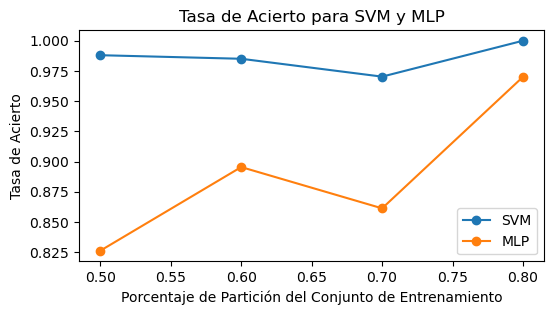

In [47]:
import matplotlib.pyplot as plt

# Definir porcentajes de partición
porcentajes_particion = [0.5, 0.6, 0.7, 0.8]

# Almacenar tasas de acierto promedio para cada porcentaje de partición
# Concatenar df_total
df_total_combined = pd.concat([df_total, df_total60_40, df_total70_30, df_total80_20], axis=0)
df_total_combined.index = ["0.5", "0.6", "0.7", "0.8"]
df_total_combined.columns = ["SVM", "MLP"]
df_total_combined

# Calcular el promedio de las tasas de acierto
# Obtener los porcentajes de partición y las tasas de acierto para SVM y MLP
svm_acc_values = df_total_combined['SVM'].values
mlp_acc_values = df_total_combined['MLP'].values

# Crear el gráfico
plt.figure(figsize=(6, 3))

# Graficar las tasas de acierto para SVM y MLP
plt.plot(porcentajes_particion, svm_acc_values, marker='o', label='SVM')
plt.plot(porcentajes_particion, mlp_acc_values, marker='o', label='MLP')

plt.xlabel('Porcentaje de Partición del Conjunto de Entrenamiento')
plt.ylabel('Tasa de Acierto')
plt.title('Tasa de Acierto para SVM y MLP')
plt.legend()

# Mostrar el gráfico
plt.show()

## **Apartado 3**

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - 

C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK
Data All
SVM
	Pipeline(steps=[('st - OK
MLP

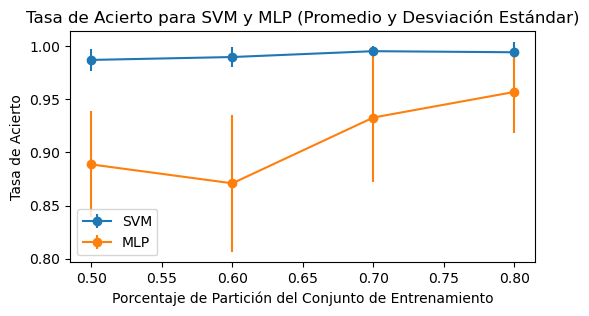

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Definir porcentajes de partición
porcentajes_particion = [0.5, 0.6, 0.7, 0.8]

# Almacenar tasas de acierto para cada porcentaje y cada método en listas
svm_acc_values = []
mlp_acc_values = []

# Realizar 10 ejecuciones para cada método y almacenar los resultados
num_ejecuciones = 10

for _ in range(num_ejecuciones):
    for porcentaje in porcentajes_particion:
        # Ejecutar los métodos utilizando las funciones proporcionadas
        run_all_save1(filename, porcentaje)
        results = get_results(filename)
        df_porcentajes = results["Acc"].astype(float)
        df_porcentajes.columns = ["SVM", "MLP"]

        # Obtener las tasas de acierto de SVM y MLP y almacenarlas
        svm_acc_values.append(df_porcentajes['SVM'].values)
        mlp_acc_values.append(df_porcentajes['MLP'].values)

# Reshape de las listas a un formato adecuado para calcular promedio y desviación estándar
svm_acc_values = np.array(svm_acc_values).reshape((num_ejecuciones, len(porcentajes_particion)))
mlp_acc_values = np.array(mlp_acc_values).reshape((num_ejecuciones, len(porcentajes_particion)))

# Calcular el promedio y la desviación estándar de las tasas de acierto
average_svm = np.mean(svm_acc_values, axis=0)
std_svm = np.std(svm_acc_values, axis=0)

average_mlp = np.mean(mlp_acc_values, axis=0)
std_mlp = np.std(mlp_acc_values, axis=0)

# Crear el gráfico con la línea del promedio y desviación estándar
plt.figure(figsize=(6, 3))

# Graficar las tasas de acierto para SVM y MLP
plt.errorbar(porcentajes_particion, average_svm, yerr=std_svm, marker='o', label='SVM')
plt.errorbar(porcentajes_particion, average_mlp, yerr=std_mlp, marker='o', label='MLP')

plt.xlabel('Porcentaje de Partición del Conjunto de Entrenamiento')
plt.ylabel('Tasa de Acierto')
plt.title('Tasa de Acierto para SVM y MLP (Promedio y Desviación Estándar)')
plt.legend()

# Mostrar el gráfico
plt.show()
